# Ensamble de ADN mediante grafos de De Bruijn

## Problema del periodico
Supongamos que metemos cada copia de un periódico de un dia especifico en un cofre de madera, imaginemos ademas que dicho cofre es detonado con dinamita y adicionalmente supongamos que no todos los periódicos están destruidos (como seguramente sucedería en la vida real) sino que estos explotaron en pequeños pedazos de confeti.
**¿qué decia el periódico?**

![](res/newspaper.png)

Este es basicamente el "problema del periodico", probablemente hayamos perdido algo de información en la explocion, sin embargo, también podemos ver que debido a que el cofre contenía muchas copias idénticas del mismo periódico, diferentes fragmentos de papel pueden superponerse y, por lo tanto, contener parte de la misma información.

![](res/news.png)

# El problema del ensamblado

El problema del periodico captura la esencia del ensamblaje de fragmentos de ADN. La tecnología de secuenciacion son (por el momento) incapaces de "leer" un genoma completo nucleótido por nucleótido, sin embargo es posible interpretar indirectamente secuencias cortas de ADN, a las que llamaremos "reads". Teniendo esto en cuenta la idea detrás de la secuenciación de ADN, entonces, es generar muchos "reads" de múltiples copias del mismo genoma, lo que resulta en un rompecabezas como el de los periodicos gigantesco.

![](res/reads.png)

Teniendo esto en cuenta, el problema de la secuenciacion genetica se reduce a la generacion de reads (un problema biologico) y el ensamble de fragmentos (un problema algoritmico). La generacion de reads ha sido el tema de discusión en varias secciones del semillero asi que será omitida.

### ¿Son el problema del ensamblado y el del periodico equivalentes?
#### * SPOILER ALERT *: NO
* El DNA tiene dos cadenas, a priori no podemos saber si una secuencia pertenece a la cadena original o a su inversa complementaria
* Las tecnicas de secuenciacion introducen cierto error

# Teoria de Grafos

Un grafo $G$ es un par ordenado $G = (V, E)$ donde:
* $V$ es un conjunto de vertices o nodos
* $E$ es un conjunto de aristas o arcos, que relacionan estos nodos.

### Grafos dirigidos
* $V \neq \emptyset$
* $E \subseteq \{(a, b)\in V\times V : a\neq b\}$ es un conjunto de pares ordenados de elementos de $V$

Data una arista $(a, b)$, $a$ es su nodo inicial y $b$ su nodo final


### Multigrafo
* V es un conjunto de vertices o nodos
* E es un multiconjunto de aristas, es decir, pueden repetirse elementos

### Camino
Se llama camino a una secuencia de vértices dentro de un grafo tal que exista una arista entre cada vértice y el siguiente. Se dice que dos vértices están conectados si existe un camino que vaya de uno a otro, de lo contrario estarán desconectados.

### Camino Eulereano
Es un camino que pasa por cada arista una y solo una vez.

* Puede ser resuelto en tiempo lineal

# LOS GRAFOS SON DIOS!

# Algoritmo de De Bruijn

Consideremos el siguiente modelo conocido como modelo de lectura densa (dense model), tratar de resolver el problema del ensamble en esta configuracion nos da un algoritmo que puede ser extrapolado para un caso mas realista.

Un modelo de lectura densa supone que tenemos un read que comienza en cada posicion del genoma, adicionalmente, que cada read posee una longitud fija $L$, por convencion al conjunto de estos reads lo llamaremos L-spectrum

![](res/Lspectrum.png)

El L-spectrum puede ser pensado como el conjunto de todos los reads de longitud $L$ unicos obtenidos cuando tenemos infinitas lecturas del genoma $G$

## Grafo de De Bruijn
En teoria de grafos, el grafo de De Bruijn estandar es un grafo que surge que tomar todos las posibles subcadenas sobre un alfabeto dado de longitud $l$ como vertices, y agregando aristas entre dos vertices si posean un sobrelapamiento de $L-1$. 

Consideraremos una version ligeramente modificada para nuestro L-spectrum

Dado el L-spectrum de un genoma, construiremos un grado de De Bruijn de la siguiente manera:
1. Agregaremos un vertice por cada (L-1)-mer en el L-espectro
2. Agregaremos $k$ aristas entre 2 (L-1)-mers si su sobrelapamiento posee longitud L-2 y el L-mer correspondiente aparece $k$ veces en el L-espectro

Veamos un ejemplo para entender esta idea, consideremos la secuencia 
`ATAGACCCTAGACGAT` y $L = 5$
de esta manera, su L-espectro estaria formado por todos las posibles subcadenas de longitud 5.

In [1]:
from talk import * 

seq = 'ATAGACCCTAGACGAT'

spect = L_spectrum(seq, 5)

ATAGACCCTAGACGA
 TAGACCCTAGACGAT
  AGACCCTAGA
   GACCCTAGAC
    ACCCTAGACG
ATAGACCCTAGACGAT


In [25]:
print(spect)

['ATAGA', 'TAGAC', 'AGACC', 'GACCC', 'ACCCT', 'CCCTA', 'CCTAG', 'CTAGA', 'TAGAC', 'AGACG', 'GACGA', 'ACGAT']


In [2]:
mers = [[mer[1:], mer[:-1]] for mer in spect]
print(mers)

[['TAGA', 'ATAG'], ['AGAC', 'TAGA'], ['GACC', 'AGAC'], ['ACCC', 'GACC'], ['CCCT', 'ACCC'], ['CCTA', 'CCCT'], ['CTAG', 'CCTA'], ['TAGA', 'CTAG'], ['AGAC', 'TAGA'], ['GACG', 'AGAC'], ['ACGA', 'GACG'], ['CGAT', 'ACGA']]


In [3]:
l_1_mer = sum(mers, [])
print(l_1_mer)

['TAGA', 'ATAG', 'AGAC', 'TAGA', 'GACC', 'AGAC', 'ACCC', 'GACC', 'CCCT', 'ACCC', 'CCTA', 'CCCT', 'CTAG', 'CCTA', 'TAGA', 'CTAG', 'AGAC', 'TAGA', 'GACG', 'AGAC', 'ACGA', 'GACG', 'CGAT', 'ACGA']


In [4]:
from itertools import permutations

l_2_mer = list(set([(i, j) \
                   for i, j in permutations(l_1_mer, 2) \
                   if i[1:] == j[:-1]]))
l_2_mer

[('ACGA', 'CGAT'),
 ('TAGA', 'AGAC'),
 ('CCTA', 'CTAG'),
 ('ACCC', 'CCCT'),
 ('ATAG', 'TAGA'),
 ('GACG', 'ACGA'),
 ('AGAC', 'GACC'),
 ('CTAG', 'TAGA'),
 ('CCCT', 'CCTA'),
 ('AGAC', 'GACG'),
 ('GACC', 'ACCC')]

In [5]:
l_2_mer_k = sum([[(i,j)] * seq.count(i + j[-1]) \
                 for i, j in l_2_mer], [])
l_2_mer_k

[('ACGA', 'CGAT'),
 ('TAGA', 'AGAC'),
 ('TAGA', 'AGAC'),
 ('CCTA', 'CTAG'),
 ('ACCC', 'CCCT'),
 ('ATAG', 'TAGA'),
 ('GACG', 'ACGA'),
 ('AGAC', 'GACC'),
 ('CTAG', 'TAGA'),
 ('CCCT', 'CCTA'),
 ('AGAC', 'GACG'),
 ('GACC', 'ACCC')]

Ya que tenemos todo en orden, creemos nuestro grafo, para esto, utilizaremos la libreria NetworkX, una libreria que permite trabajar con grafos comodamente

In [6]:
import networkx as nx

DB = nx.MultiDiGraph()

DB.add_nodes_from(l_1_mer)
DB.add_edges_from(l_2_mer_k);

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

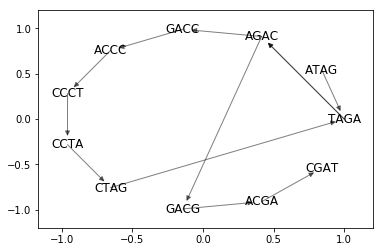

In [7]:
visualize_graph(DB)

Notemos que el camino eulereano de este grafo corresponde exactamente con la secuencia que deseamos reconstruir. Luego si el camino eulereano es unico, entonces el genoma puede ser ensamblado a partir del grafo de De Bruijn inducido por el L-spectrum .

Una pareja de reads repetidos se dice _intercalados_ si aparecen alternadas en el genoma. La longitud del mas corto de ellos es conocida como la _longitud de la repeticion intercalada_ y se simboliza con $l_\text{intervaled}$

![](res/interleaved.png)

Una repeticion triple, es una repeticion que aparece tres veces en el genoma, es un caso especial de reads intercalados. La longitud de dicho read es $l_\text{triple}$

![](res/triple.png)

**Teorema**: Si $L$, es estrictamente mayor a $\max(l_\text{intervaled}, l_\text{triple})$

In [15]:
path = list(euler_path(DB))
path

[('ATAG', 'TAGA'),
 ('TAGA', 'AGAC'),
 ('AGAC', 'GACC'),
 ('GACC', 'ACCC'),
 ('ACCC', 'CCCT'),
 ('CCCT', 'CCTA'),
 ('CCTA', 'CTAG'),
 ('CTAG', 'TAGA'),
 ('TAGA', 'AGAC'),
 ('AGAC', 'GACG'),
 ('GACG', 'ACGA'),
 ('ACGA', 'CGAT')]

In [24]:
for i, mer in enumerate([i + j[-1] for i, j in path]):
    print(' ' * i + mer)
print(seq)

ATAGA
 TAGAC
  AGACC
   GACCC
    ACCCT
     CCCTA
      CCTAG
       CTAGA
        TAGAC
         AGACG
          GACGA
           ACGAT
ATAGACCCTAGACGAT


## Un algoritmo practico basado en el grafo de De Bruijn
Hemos visto que reconstruir el genoma es relativamente simple en el hipotetico caso de que se posea el L-spectrum del genoma, sin embargo, la vida real (como siempre) es mas dura.

Para construir una version mas practica del grafo de De Bruijn introduciremos el concepto de k-coverage en el cual, cada substring de longitud k aparece en al menos 1 read. 

Basicamente tratamos de encontrar el k-spectrum de un genoma con reads de longitud L con L > k. cada read de longitud L nos dan L-k+1 string de longitud k (llamados k-mers). Para cuantificar el numero de reads necesarios para que esto funcione correctamente, dada una probabilidad de evento (1−ϵ), debemos caracterizar el numero de reads de longitud L necesarios para cubrir el k-espectro.

Notemos que si deseamos conseguir el k-coverage, para cada read debe existir un segundo read que empieza L-k+1 despues de la posicion inicial de este relativa al genoma. 


Notemos que si es posible generar el k-coverage entonces podemos recuperar el k-spectrum del genoma.

Consideremos el siguiente algoritmo:
```
Leamos suficientes reads para conseguir un k-coverage
Corramos el algoritmo de De Bruijn con los k-espectros obtenidos
```

De aqui podemos notar que existe cierto tradeoff en la eleccion de k, se necesita que $k-1 > l_\text{interleaved}$ para cumplir las condiciones de Ukkonen. Por lo tanto, un valor largo de k da la posibilidad de ensamblar mas genomas, sin embargo, valores largos de k traen valores pequeños de L-k+1. k coverage nos dice que necesitamos obtener reads que comience en cada ventana de L-k+1, lo por que requeriria mayor cantidad de reads

## Un par de detalles mas

* Cada k-mer es representado con nodos "gemelos", para resolver el problema con la cadena complementaria.
* Una vez se tiene construido el grafo, se suelen aplicar diferentes tecnicas para reducir el error en estas, usualmente, basadas en la topologia del grafo

* Un bajo coverage es matematicamente poco esperanzador
* Una gran cantidad de regiones repetitivas es retador
* Una buena longitud de reads ayuda especialmente cuando hay largas regiones repetitivas
* Una tasa de error alta disminuye el coverage